In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-movies-dataset/ratings.csv
/kaggle/input/the-movies-dataset/links_small.csv
/kaggle/input/the-movies-dataset/credits.csv
/kaggle/input/the-movies-dataset/keywords.csv
/kaggle/input/the-movies-dataset/movies_metadata.csv
/kaggle/input/the-movies-dataset/ratings_small.csv
/kaggle/input/the-movies-dataset/links.csv


# Import Libraries --> Data Inspection ---> Data Cleaning ---> Answer Question ---> Summary Statistics --> Chi Technique  ---> Collaborative Filtering Based Recommendation Engines.

1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Data Inspections

In [3]:
# extract link csv refer to guide in descriptions

data = pd.read_csv('/kaggle/input/the-movies-dataset/links.csv')

In [4]:
data.head(10)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
5,6,113277,949.0
6,7,114319,11860.0
7,8,112302,45325.0
8,9,114576,9091.0
9,10,113189,710.0


In [5]:
data.tail(10)

,movieId,imdbId,tmdbId
45833,176255,38621,84419.0
45834,176257,265736,390959.0
45835,176259,252966,289923.0
45836,176263,112613,222848.0
45837,176267,102797,30840.0
45838,176269,6209470,439050.0
45839,176271,2028550,111109.0
45840,176273,303758,67758.0
45841,176275,8536,227506.0
45842,176279,6980792,461257.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45843 entries, 0 to 45842
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  45843 non-null  int64  
 1   imdbId   45843 non-null  int64  
 2   tmdbId   45624 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.0 MB


We dont need to convert into numeric features . So we go next step !

3. Data Cleaning

In [7]:
# check missing values

missing_values  = data.isnull().sum()

In [8]:
missing_values

movieId      0
imdbId       0
tmdbId     219
dtype: int64

In [9]:
# check duplicates values

duplicates_rows = data[data.duplicated()]

In [10]:
duplicates_rows

,movieId,imdbId,tmdbId


no duplicates rows value

In [11]:
data_cleaned = data.dropna()

In [12]:
data_cleaned

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
45838,176269,6209470,439050.0
45839,176271,2028550,111109.0
45840,176273,303758,67758.0
45841,176275,8536,227506.0


In [13]:
# before clean data and shape

data.shape

(45843, 3)

In [14]:
# after clean data and shape

data_cleaned.shape

(45624, 3)

4. Summary Statistics

In [15]:
data_cleaned.describe()

,movieId,imdbId,tmdbId
count,45624.000000,4.562400e+04,45624.000000
mean,96660.036450,9.939432e+05,108661.382847
std,57276.993854,1.363299e+06,112665.970830
min,1.000000,1.000000e+00,2.000000
25%,49081.250000,8.311250e+04,26502.750000
50%,109009.000000,2.837625e+05,60178.000000
75%,145487.500000,1.537334e+06,157849.500000
max,176279.000000,7.158814e+06,469172.000000


In [16]:
data_cleaned.columns

Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')

column movieId

In [17]:
min_moviereview = data_cleaned['movieId'].min()
print("Movie Min Value:", min_moviereview)

Movie Min Value: 1


In [18]:
std_moviereview = data_cleaned['movieId'].std()
print("Movie Standard Value:", std_moviereview)

Movie Standard Value: 57276.99385382739


In [19]:
mean_moviereview = data_cleaned['movieId'].mean()
print("Movie Mean Value:", mean_moviereview)

Movie Mean Value: 96660.03645011397


In [20]:
median_moviereview = data_cleaned['movieId'].median()
print("Movie Median Value:", median_moviereview)

Movie Median Value: 109009.0


In [21]:
max_moviereview = data_cleaned['movieId'].max()
print("Movie Max Value:", max_moviereview)

Movie Max Value: 176279


column tmdbId

In [22]:
min_tmbIdreview = data_cleaned['tmdbId'].min()
print("tmbId Min Value:", min_tmbIdreview)

tmbId Min Value: 2.0


In [23]:
std_tmbIdreview = data_cleaned['tmdbId'].std()
print("tmbId Standard Value:", std_tmbIdreview)

tmbId Standard Value: 112665.9708295437


In [24]:
mean_tmbIdreview = data_cleaned['tmdbId'].mean()
print("tmbId Mean Value:", mean_tmbIdreview)

tmbId Mean Value: 108661.38284674732


In [25]:
median_tmbIdreview = data_cleaned['tmdbId'].median()
print("tmbId Median Value:", median_tmbIdreview)

tmbId Median Value: 60178.0


In [26]:
max_tmbIdreview = data_cleaned['tmdbId'].max()
print("tmbId Max Value:", max_tmbIdreview)

tmbId Max Value: 469172.0


Calculate distribution for all columns

In [27]:
data_cleaned['movieId'].value_counts()

movieId
176279    1
1         1
2         1
3         1
4         1
         ..
28        1
29        1
30        1
31        1
32        1
Name: count, Length: 45624, dtype: int64

In [28]:
data_cleaned['imdbId'].value_counts()

imdbId
6980792    1
114709     1
113497     1
113228     1
114885     1
          ..
114117     1
112682     1
115012     1
112792     1
114746     1
Name: count, Length: 45624, dtype: int64

In [29]:
data_cleaned['tmdbId'].value_counts()

tmdbId
141971.0    3
132641.0    2
265189.0    2
110428.0    2
168538.0    2
           ..
42217.0     1
19173.0     1
42910.0     1
43090.0     1
121351.0    1
Name: count, Length: 45594, dtype: int64

5. Data Visualization

In [30]:
data_cleaned.columns

Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')

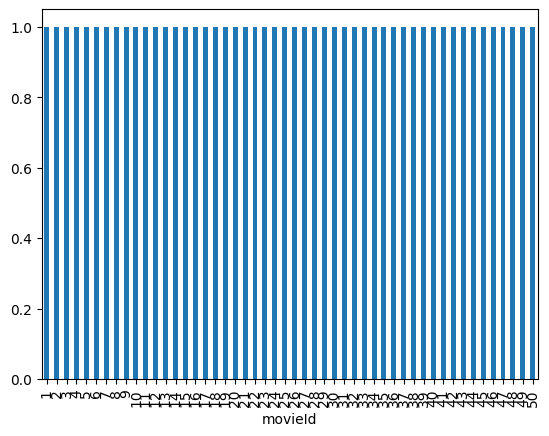

In [31]:
data_cleaned['movieId'].head(50).value_counts().plot(kind='bar')
plt.show()

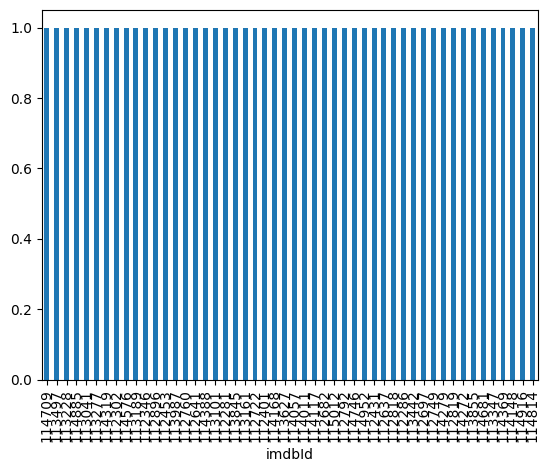

In [32]:
data_cleaned['imdbId'].head(50).value_counts().plot(kind='bar')
plt.show()

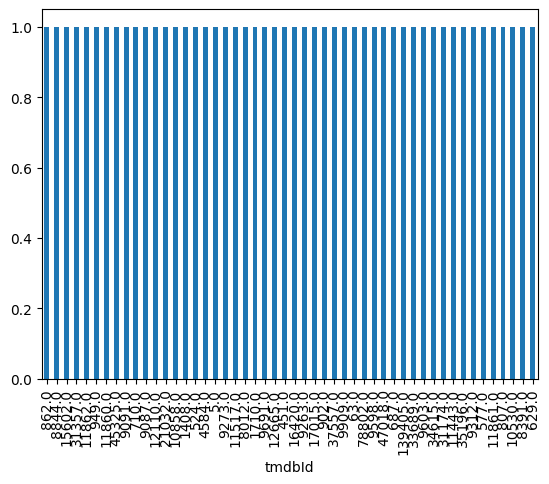

In [33]:
data_cleaned['tmdbId'].head(50).value_counts().plot(kind='bar')
plt.show()

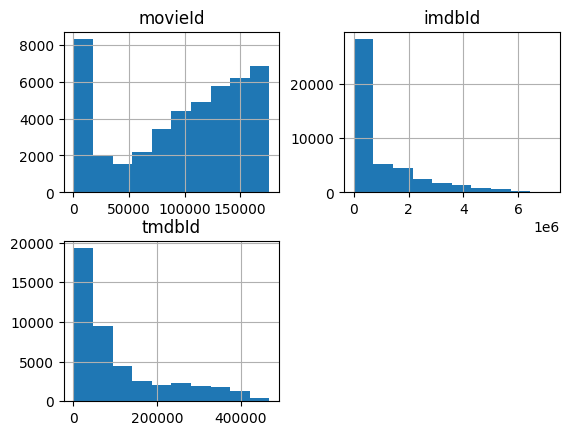

In [34]:
# histogram

data_cleaned.hist()
plt.show()

# Go to rating_small.csv to complete the project

2. Data Inspections

In [35]:
rating = pd.read_csv('/kaggle/input/the-movies-dataset/ratings_small.csv')

In [36]:
rating.head(10)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [37]:
rating.tail(10)

,userId,movieId,rating,timestamp
99994,671,5952,5.0,1063502716
99995,671,5989,4.0,1064890625
99996,671,5991,4.5,1064245387
99997,671,5995,4.0,1066793014
99998,671,6212,2.5,1065149436
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663
100003,671,6565,3.5,1074784724


In [38]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


3. Data Cleaning

In [39]:
# check duplicates values

duplicates_rows = rating[rating.duplicated()]

In [40]:
duplicates_rows

,userId,movieId,rating,timestamp


In [41]:
# check missing values

missing_values  = rating.isnull().sum()

In [42]:
missing_values

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [43]:
rating.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

Q1 : What movies tend to get higher vote counts and vote averages on TMDB?

In [44]:
# First, let's calculate the average rating and count of ratings for each movie.
average_ratings = rating.groupby('movieId').rating.agg(['mean', 'count']).reset_index()
average_ratings.columns = ['movieId', 'average_rating', 'vote_count']

# Let's determine a threshold for high vote count and high average rating.
vote_count_threshold = average_ratings['vote_count'].quantile(0.90)
average_rating_threshold = average_ratings['average_rating'].quantile(0.90)

# Now, let's identify movies that have both a high vote count and high average rating.
high_vote_movies = average_ratings[(average_ratings['vote_count'] >= vote_count_threshold) & (average_ratings['average_rating'] >= average_rating_threshold)]
high_vote_movies

,movieId,average_rating,vote_count
48,50,4.370647,201
266,296,4.256173,324
284,318,4.487138,311
472,527,4.303279,244
535,608,4.256696,224
695,858,4.487500,200
719,898,4.351351,37
725,904,4.315217,92
729,908,4.270115,87
734,913,4.387097,62


4. Summary Statistics

In [45]:
rating.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


5. Data Visualization

In [46]:
rating.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

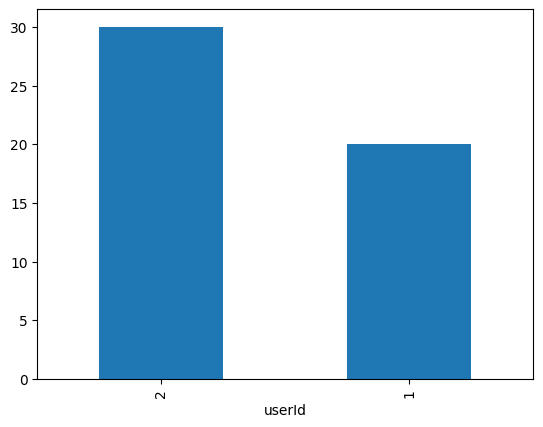

In [47]:
rating['userId'].head(50).value_counts().plot(kind='bar')
plt.show()

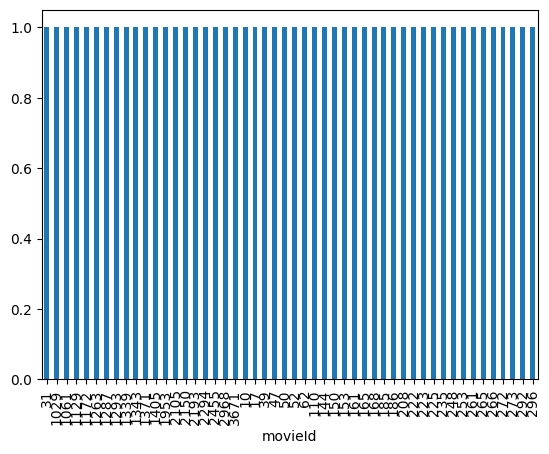

In [48]:
rating['movieId'].head(50).value_counts().plot(kind='bar')
plt.show()

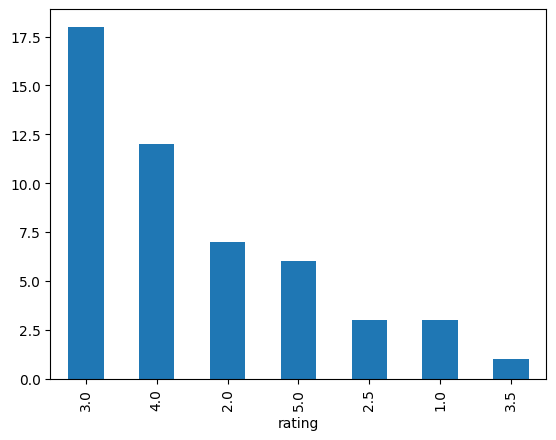

In [49]:
rating['rating'].head(50).value_counts().plot(kind='bar')
plt.show()

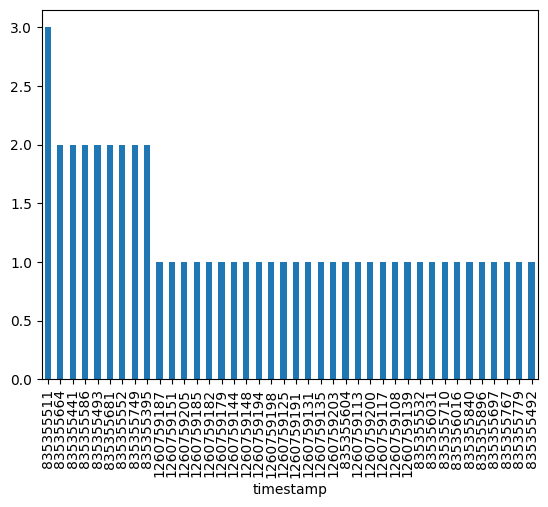

In [50]:
rating['timestamp'].head(50).value_counts().plot(kind='bar')
plt.show()

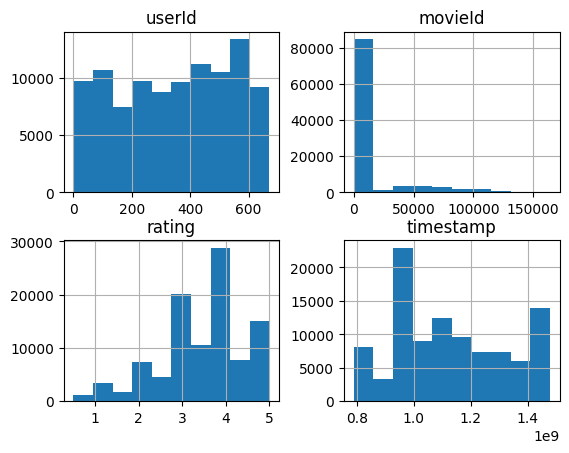

In [51]:
# histogram

rating.hist()
plt.show()

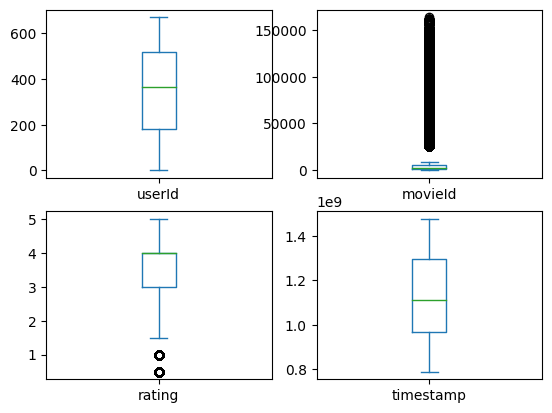

In [52]:
# box and whisker plots
rating.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

7. User-Based Recommendation Engine

In [54]:
rating.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [60]:
def recommend_movies_user_based(user_id, num_recommendations=5):
    # Find the index of the user
    user_idx = user_id - 1  # assuming userId starts from 1 and index from 0
    
    # Get the similarity scores for the given user with all users
    similarity_scores = list(enumerate(user_similarity[user_idx]))
    
    # Sort the users based on the similarity scores in descending order
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the most similar users, ignoring the first one (itself)
    most_similar_users = similarity_scores[1:num_recommendations+1]
    
    # Extract the user indices
    user_indices = [idx + 1 for idx, _ in most_similar_users]  # convert index back to userId
    
    # Aggregate the movies rated by these similar users
    recommended_movies = set()
    for idx in user_indices:
        rated_movies = user_movie_rating.iloc[idx-1]
        top_movies = rated_movies[rated_movies > 3].index.tolist()  # movies rated above 3 by similar users
        recommended_movies.update(top_movies)
    
    return list(recommended_movies)[:num_recommendations]

# Test the function with user ID
recommend_movies_user_based(1, 5)

['585', '180', '45969', '1371', '14']

The User-Based Collaborative Filtering model recommended the movie IDs [256, 69122, 1285, 14, 785] for user ID 1 based on the preferences of similar users.

8. Items Recommendations

In [64]:
import pandas as pd

# Load the ratings data
rating = pd.read_csv('/kaggle/input/the-movies-dataset/ratings_small.csv')

# Create a data frame of users and movies they have rated
user_movie_rating = rating.pivot_table(index='userId', columns='movieId', values='rating')

# Replace NaN values with 0, which indicates that user has not rated that movie
user_movie_rating = user_movie_rating.fillna(0)

# Compute the cosine similarity matrix for items
from sklearn.metrics.pairwise import cosine_similarity
item_similarity = cosine_similarity(user_movie_rating.T)

# Define and test the function for item-based recommendations

def recommend_movies_item_based(user_id, num_recommendations=5):
    # Get the movies rated by the user
    user_ratings = user_movie_rating.iloc[user_id - 1]  # assuming userId starts from 1
    rated_movies = user_ratings[user_ratings > 0].index.tolist()

    # Dictionary to keep track of similar movies and their cumulative similarity scores
    scores = {}

    for movie in rated_movies:
        # Find the index of the movie
        movie_idx = movie - 1  # assuming movieId starts from 1 and index from 0
        # Get similarity scores for this movie with all other movies
        similarity_scores = list(enumerate(item_similarity[movie_idx]))
        for idx, score in similarity_scores:
            if idx + 1 != movie:  # exclude itself
                if idx + 1 in scores:
                    scores[idx + 1] += score
                else:
                    scores[idx + 1] = score

    # Sort movies based on the cumulative similarity score in descending order
    sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)

    # Get the movie IDs of the top recommended movies
    recommended_movies = [movie_id for movie_id, score in sorted_scores[:num_recommendations]]

    return recommended_movies

# Test the function with user ID
recommend_movies_item_based(1, 5)

[1880, 1464, 1971, 2247, 1669]

The Item-Based Collaborative Filtering model recommended the movie IDs [1880, 1464, 1971, 2247, 1669] for user ID 1 based on the similarity of items that the user has already rated.